In [1]:
import pandas as pd
from sklearn import preprocessing
from matplotlib import pyplot as plt
from random import shuffle
import seaborn as sns
import os, sys
import shutil

from data_processing import processing
from utilities import utils

In [2]:
dp = processing.DataProcess()
dp.read_and_process()

In [3]:
util = utils.Utils()
plotter = utils.Plotting()

In [4]:
from image_features import features

In [5]:
img_feat = features.ImageFeatures()

In [6]:
# /Users/yachnasharma/Downloads/case_study_visual_intelligence/VIntel/data/home_depot_products/bar_stool

In [7]:
data, unread = img_feat.filter_images()

/Users/yachnasharma/Downloads/case_study_visual_intelligence/VIntel/data/home_depot_products/bar_stool/
/Users/yachnasharma/Downloads/case_study_visual_intelligence/VIntel/data/home_depot_products/bookcase/


/Users/yachnasharma/Downloads/boosting/py3_venv/lib/python3.7/site-packages/VIntel-0.1-py3.7.egg/image_features/features.py:43: RuntimeWarning: divide by zero encountered in log


/Users/yachnasharma/Downloads/case_study_visual_intelligence/VIntel/data/home_depot_products/chandelier/
/Users/yachnasharma/Downloads/case_study_visual_intelligence/VIntel/data/home_depot_products/dining_chair/
/Users/yachnasharma/Downloads/case_study_visual_intelligence/VIntel/data/home_depot_products/market_umbrella/
/Users/yachnasharma/Downloads/case_study_visual_intelligence/VIntel/data/home_depot_products/night_stands/
Could not open image:/Users/yachnasharma/Downloads/case_study_visual_intelligence/VIntel/data/home_depot_products/night_stands/faabe73b-7eb7-4dac-bea4-00f998988562.jpg
/Users/yachnasharma/Downloads/case_study_visual_intelligence/VIntel/data/home_depot_products/ottoman/
/Users/yachnasharma/Downloads/case_study_visual_intelligence/VIntel/data/home_depot_products/sconces/
Could not open image:/Users/yachnasharma/Downloads/case_study_visual_intelligence/VIntel/data/home_depot_products/sconces/dc344290-d864-48b2-a2cc-10dc537707b61.jpg
Could not open image:/Users/yachnas

In [8]:
len(data)

9

In [9]:
df = pd.DataFrame(data)
df.sample(5)

,dissimilarity,correlation,contrast,homogeneity,asm,energy,quality_labels,class_labels,image_name
2962,63.375965,0.394224,16089.107009,0.645954,0.183938,0.428880,0,sconces,07e5f8b5-35ae-4c2b-9796-f225491ae998.jpg
3359,0.859764,0.005397,44.791475,0.683365,0.157701,0.397116,1,vases,3ff3a147-8ae7-4c62-b002-02cdd7d6e710.jpg
2598,5.023111,0.001825,1144.940068,0.729968,0.122456,0.349937,1,sconces,0daf0af9-b173-45a4-8b7c-5e9f7ef167c3.jpg
828,1.247308,0.003479,142.798322,0.680001,0.098806,0.314334,1,bookcase,cebf075f-5322-4bb1-bc82-a00299ffad06.jpg
2700,1.799521,0.011706,293.374689,0.691333,0.120889,0.347691,1,sconces,98baf223-82d5-4451-bafa-29148ef919de.jpg


In [10]:
df.shape

(3441, 9)

In [11]:
len(unread)

4

In [12]:
df_labels = df[['quality_labels', 'class_labels', 'image_name']]
df_features = df[['dissimilarity', 'correlation', 'contrast', 'homogeneity', 'asm', 'energy']]

In [13]:
# normalize features
# x = df_features.values #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(x)
# df1 = pd.DataFrame(x_scaled, columns=df_features.columns)
# df1["quality_labels"] = df_labels["quality_labels"]
# df1["class_labels"] = df_labels["class_labels"]
# df1["image_name"] = df_labels["image_name"]


In [14]:
# df.iloc[50]

In [15]:
# df1=df

In [16]:
df.describe()

,dissimilarity,correlation,contrast,homogeneity,asm,energy,quality_labels
count,3441.000000,3441.000000,3441.000000,3441.000000,3441.000000,3441.000000,3441.000000
mean,10.714600,0.056761,2584.019875,0.692502,0.137234,0.367531,0.873583
std,20.370189,0.132027,5225.967460,0.031014,0.040612,0.046428,0.332367
min,0.000000,-0.022768,0.000000,0.352540,0.078053,0.279379,0.000000
25%,1.221505,-0.000199,138.988670,0.679333,0.114552,0.338455,1.000000
50%,2.027406,0.004314,354.352076,0.688404,0.126273,0.355349,1.000000
75%,5.026317,0.015640,1145.292237,0.704909,0.149395,0.386517,1.000000
max,63.375965,1.000000,16089.107009,1.000000,1.000000,1.000000,1.000000


In [17]:
df.groupby("quality_labels").mean()

,dissimilarity,correlation,contrast,homogeneity,asm,energy
quality_labels,,,,,,
0,63.375965,0.394224,16089.107009,0.645954,0.183938,0.428880
1,3.093944,0.007926,629.690899,0.699238,0.130476,0.358653


In [18]:
df.groupby("class_labels").describe()

dissimilarity                                            \
                        count       mean        std       min       25%   
class_labels                                                              
bar_stool               341.0  14.051259  24.047648  0.711295  1.330226   
bookcase                499.0  15.073026  22.156242  0.000000  1.713412   
chandelier              584.0   4.305193  12.087633  0.761361  1.119242   
dining_chair            463.0  13.465875  22.577682  0.794198  1.638719   
market_umbrella         382.0  10.469676  21.106640  0.766465  1.172684   
night_stands             41.0  21.222217  26.885036  0.936551  1.509182   
ottoman                 253.0  18.291050  27.940766  0.693725  0.870082   
sconces                 413.0   7.407797  14.385448  0.801139  1.530923   
table_lamp              264.0   9.154261  17.628114  0.839657  1.318013   
vases                   201.0   4.148154  12.165922  0.691562  0.956066   

                                                correlation            ...  \
                      50%        75%        max       count      mean  ...   
class_labels                                                           ...   
bar_stool        2.269095   5.306866  63.375965       341.0  0.079521  ...   
bookcase         4.496545  14.303824  63.375965       499.0  0.080693  ...   
chandelier       1.408250   2.127043  63.375965       584.0  0.020036  ...   
dining_chair     3.107243   6.389676  63.375965       463.0  0.069861  ...   
market_umbrella  2.042191   3.327798  63.375965       382.0  0.058118  ...   
night_stands     4.907355  63.375965  63.375965        41.0  0.112055  ...   
ottoman          1.096676  63.375965  63.375965       253.0  0.120985  ...   
sconces          2.407448   5.211809  63.375965       413.0  0.027339  ...   
table_lamp       2.132618   5.855212  63.375965       264.0  0.042047  ...   
vases            1.306057   1.959615  63.375965       201.0  0.020337  ...   

                   energy           quality_labels                           \
                      75%       max          count      mean       std  min   
class_labels                                                                  
bar_stool        0.375132  0.529276          341.0  0.809384  0.393364  0.0   
bookcase         0.428880  1.000000          499.0  0.835671  0.370945  0.0   
chandelier       0.361030  0.513368          584.0  0.960616  0.194673  0.0   
dining_chair     0.382685  0.565515          463.0  0.833693  0.372758  0.0   
market_umbrella  0.385944  0.511781          382.0  0.863874  0.343372  0.0   
night_stands     0.428880  0.531108           41.0  0.731707  0.448575  0.0   
ottoman          0.428880  0.428880          253.0  0.723320  0.448244  0.0   
sconces          0.385769  0.578965          413.0  0.944310  0.229600  0.0   
table_lamp       0.392406  0.575117          264.0  0.909091  0.288026  0.0   
vases            0.378166  0.502878          201.0  0.960199  0.195979  0.0   

                                     
                 25%  50%  75%  max  
class_labels                         
bar_stool        1.0  1.0  1.0  1.0  
bookcase         1.0  1.0  1.0  1.0  
chandelier       1.0  1.0  1.0  1.0  
dining_chair     1.0  1.0  1.0  1.0  
market_umbrella  1.0  1.0  1.0  1.0  
night_stands     0.0  1.0  1.0  1.0  
ottoman          0.0  1.0  1.0  1.0  
sconces          1.0  1.0  1.0  1.0  
table_lamp       1.0  1.0  1.0  1.0  
vases            1.0  1.0  1.0  1.0  

[10 rows x 56 columns]

In [19]:
class_dis_means = df.groupby("class_labels").describe()['dissimilarity']['mean']
class_dis_stds = df.groupby("class_labels").describe()['dissimilarity']['std']
class_dis_means + 1.25*class_dis_stds

class_labels
bar_stool          44.110820
bookcase           42.768328
chandelier         19.414734
dining_chair       41.687978
market_umbrella    36.852976
night_stands       54.828513
ottoman            53.217008
sconces            25.389607
table_lamp         31.189404
vases              19.355556
dtype: float64

In [20]:
# df['class_labels'].value_counts()

In [21]:
df['class_labels'].value_counts()*0.60

chandelier         350.4
bookcase           299.4
dining_chair       277.8
sconces            247.8
market_umbrella    229.2
bar_stool          204.6
table_lamp         158.4
ottoman            151.8
vases              120.6
night_stands        24.6
Name: class_labels, dtype: float64

In [22]:
df['class_labels'].value_counts()*0.20

chandelier         116.8
bookcase            99.8
dining_chair        92.6
sconces             82.6
market_umbrella     76.4
bar_stool           68.2
table_lamp          52.8
ottoman             50.6
vases               40.2
night_stands         8.2
Name: class_labels, dtype: float64

In [23]:
df['class_labels'].value_counts()*0.20

chandelier         116.8
bookcase            99.8
dining_chair        92.6
sconces             82.6
market_umbrella     76.4
bar_stool           68.2
table_lamp          52.8
ottoman             50.6
vases               40.2
night_stands         8.2
Name: class_labels, dtype: float64

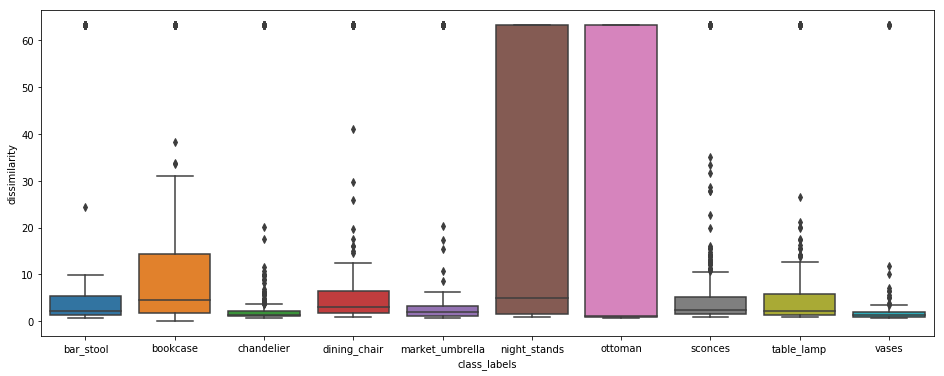

In [24]:
plt.figure(figsize=(16, 6))
ax = sns.boxplot(x="class_labels", y="dissimilarity", data=df)

In [25]:
# df1 = df.query('20 < dissimilarity & class_labels = bar_stool')
df1 = df.loc[(df['dissimilarity'] >= 20) & (df['class_labels'] == 'bar_stool')]
df1c = df.loc[(df['dissimilarity'] < 20) & (df['class_labels'] == 'bar_stool')]

df2 = df.loc[(df['dissimilarity'] >= 30) & (df['class_labels'] == 'bookcase')]
df2c = df.loc[(df['dissimilarity'] < 30) & (df['class_labels'] == 'bookcase')]

df3 = df.loc[(df['dissimilarity'] >= 10) & (df['class_labels'] == 'chandelier')]
df3c = df.loc[(df['dissimilarity'] < 10) & (df['class_labels'] == 'chandelier')]

df4 = df.loc[(df['dissimilarity'] >= 10) & (df['class_labels'] == 'dining_chair')]
df4c = df.loc[(df['dissimilarity'] < 10) & (df['class_labels'] == 'dining_chair')]

df5 = df.loc[(df['dissimilarity'] >= 10) & (df['class_labels'] == 'market_umbrella')]
df5c = df.loc[(df['dissimilarity'] < 10) & (df['class_labels'] == 'market_umbrella')]

df6 = df.loc[(df['dissimilarity'] >= 50) & (df['class_labels'] == 'night_stands')]
df6c = df.loc[(df['dissimilarity'] < 50) & (df['class_labels'] == 'night_stands')]

df7 = df.loc[(df['dissimilarity'] >= 50) & (df['class_labels'] == 'ottoman')]
df7c = df.loc[(df['dissimilarity'] < 50) & (df['class_labels'] == 'ottoman')]

df8 = df.loc[(df['dissimilarity'] >= 20) & (df['class_labels'] == 'sconces')]
df8c = df.loc[(df['dissimilarity'] < 20) & (df['class_labels'] == 'sconces')]

df9 = df.loc[(df['dissimilarity'] >= 20) & (df['class_labels'] == 'table_lamp')]
df9c = df.loc[(df['dissimilarity'] < 20) & (df['class_labels'] == 'table_lamp')]

df10 = df.loc[(df['dissimilarity'] >= 8) & (df['class_labels'] == 'vases')]
df10c = df.loc[(df['dissimilarity'] < 8) & (df['class_labels'] == 'vases')]
# df2 = df.query('30 < dissimilarity')
# df3 = df.query('10 < dissimilarity')
# df4 = df.query('10 < dissimilarity')
# df5 = df.query('10 < dissimilarity')

In [26]:
clean_data = pd.concat([df1c, df2c, df3c, df4c, df5c, df6c, df7c, df8c, df9c, df10c])
clean_data.shape

(2964, 9)

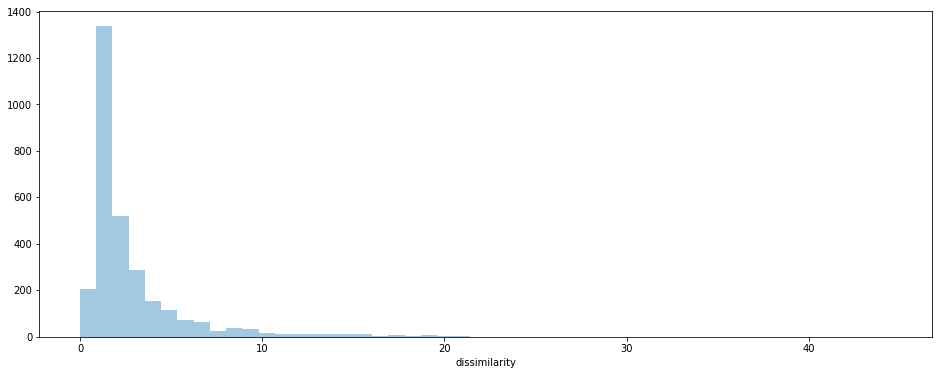

In [27]:
plt.figure(figsize=(16, 6))
sns.distplot(clean_data['dissimilarity'],kde = False)
plt.show()

In [28]:
df1.shape

(66, 9)

In [29]:
 df1.sample(5)

,dissimilarity,correlation,contrast,homogeneity,asm,energy,quality_labels,class_labels,image_name
206,63.375965,0.394224,16089.107009,0.645954,0.183938,0.42888,0,bar_stool,91967331-7180-4f55-a0cc-ef402aa2e520.jpg
246,63.375965,0.394224,16089.107009,0.645954,0.183938,0.42888,0,bar_stool,f10c66cd-675e-4c93-8a45-21cdc80130e4.jpg
112,63.375965,0.394224,16089.107009,0.645954,0.183938,0.42888,0,bar_stool,c4b745f6-ff88-4220-a9e4-cdc17823eeb5.jpg
236,63.375965,0.394224,16089.107009,0.645954,0.183938,0.42888,0,bar_stool,efe31b44-4081-443d-9163-8d830107ffe6.jpg
102,63.375965,0.394224,16089.107009,0.645954,0.183938,0.42888,0,bar_stool,60e0beac-8c7b-4573-af64-5de925215375.jpg


In [30]:
for index, row in clean_data.iterrows():
    image_path = util.data_dir + '/' + row['class_labels'] + '/' + row['image_name']
#     plotter.plot_image(image_path)
#     print(image_path)

In [28]:
data = pd.concat([clean_data, pd.get_dummies(clean_data['class_labels'])], axis=1)
data.sample(50)

,dissimilarity,correlation,contrast,homogeneity,asm,energy,quality_labels,class_labels,image_name,bar_stool,bookcase,chandelier,dining_chair,market_umbrella,night_stands,ottoman,sconces,table_lamp,vases
133,2.027406,-0.003572,345.673447,0.681225,0.117027,0.342092,1,bar_stool,1e33de29-391c-4d2e-9ebd-b94b1daf4e39.jpg,1,0,0,0,0,0,0,0,0,0
2905,8.802913,0.004148,2115.390345,0.731477,0.162814,0.403502,1,sconces,68e198f6-edfc-4dc6-b5fd-26369c801faa.jpg,0,0,0,0,0,0,0,1,0,0
957,3.927618,-0.005090,856.973559,0.718580,0.111642,0.334129,1,chandelier,8d74fc84-ee74-4a38-a32d-5f74cb92ba08.jpg,0,0,1,0,0,0,0,0,0,0
2591,8.718112,0.012111,2102.784845,0.745847,0.156329,0.395385,1,sconces,20696368-57fb-4f53-a17e-012d25091643.jpg,0,0,0,0,0,0,0,1,0,0
2923,5.527110,0.001351,1253.044136,0.696941,0.100946,0.317721,1,sconces,9e891e63-0e0c-4dd0-9713-b85e1ee70e07.jpg,0,0,0,0,0,0,0,1,0,0
2997,1.033833,0.004412,88.661074,0.681292,0.120075,0.346518,1,table_lamp,2a6652f2-e9cb-4643-bf54-cbd3a9705442.jpg,0,0,0,0,0,0,0,0,1,0
892,2.348886,0.005349,440.107290,0.699513,0.139544,0.373556,1,chandelier,ca07ab07-f8e0-43de-a715-d23ade3b14f4.jpg,0,0,1,0,0,0,0,0,0,0
53,1.606636,-0.000819,242.163160,0.688744,0.106172,0.325840,1,bar_stool,59f8fd79-bc49-481a-b49b-ecbe9c7c7f26.jpg,1,0,0,0,0,0,0,0,0,0
1535,3.714206,-0.009938,792.852590,0.703488,0.103460,0.321651,1,dining_chair,dfe9df41-cae1-4057-a20d-d879717d9386.jpg,0,0,0,1,0,0,0,0,0,0
2875,5.319488,-0.001541,1216.273515,0.719312,0.152057,0.389945,1,sconces,155a1c23-9608-4b90-b69a-a377ef049ad3.jpg,0,0,0,0,0,0,0,1,0,0


In [29]:
data.columns

Index(['dissimilarity', 'correlation', 'contrast', 'homogeneity', 'asm',
       'energy', 'quality_labels', 'class_labels', 'image_name', 'bar_stool',
       'bookcase', 'chandelier', 'dining_chair', 'market_umbrella',
       'night_stands', 'ottoman', 'sconces', 'table_lamp', 'vases'],
      dtype='object')

In [30]:
data = data.drop(['dissimilarity', 'correlation', 'contrast', 'homogeneity', 'asm', 'energy', 'quality_labels'], axis=1)

In [31]:
data.sample(10)

,class_labels,image_name,bar_stool,bookcase,chandelier,dining_chair,market_umbrella,night_stands,ottoman,sconces,table_lamp,vases
925,chandelier,cf6d9180-213d-417a-87d6-d7d84f99362f.jpg,0,0,1,0,0,0,0,0,0,0
2541,ottoman,04458b82-055b-4e22-9474-f50fdafb89ec.jpg,0,0,0,0,0,0,1,0,0,0
3432,vases,b13dbdfc-299d-43db-b250-70da2944fda6.jpg,0,0,0,0,0,0,0,0,0,1
2690,sconces,0b1df061-5b0e-432d-bc69-0eb5cf6ba21f.jpg,0,0,0,0,0,0,0,1,0,0
1270,chandelier,b9e1591b-b922-4683-9ff4-7fd3a2d89488.jpg,0,0,1,0,0,0,0,0,0,0
49,bar_stool,82780605-5d51-4485-b7ce-ac8b2021c332.jpg,1,0,0,0,0,0,0,0,0,0
1877,dining_chair,3ca74c9b-49e0-424f-903c-b7c6dd30a462.jpg,0,0,0,1,0,0,0,0,0,0
635,bookcase,eacb43fb-5c8d-474d-b12c-708e8436c966.jpg,0,1,0,0,0,0,0,0,0,0
2381,ottoman,74a96121-9b38-45bd-a829-4393426761ff.jpg,0,0,0,0,0,0,1,0,0,0
667,bookcase,794c27a8-3ca0-4480-ac48-0c803c5614cd.jpg,0,1,0,0,0,0,0,0,0,0


In [32]:
data['location'] = util.data_dir + '/' + data['class_labels'] + '/' + data['image_name']

In [33]:
data.iloc[1].location

'/Users/yachnasharma/Downloads/case_study_visual_intelligence/VIntel/data/home_depot_products/bar_stool/7b1788f7-cbb5-473e-9b66-3c549e5ca6fe.jpg'

In [34]:
data.to_csv('data.csv')

In [35]:
file_locations = list(data['location'].values)
print(len(file_locations))
shuffle(file_locations)
# print(file_locations)

2964


In [36]:
file_ext = [f.split('.')[-1] for f in file_locations]
print(len(file_ext))
file_vals = [f for f in file_ext if f == 'jpg']
print(len(file_vals))
# print(file_ext)

2964
2964


In [37]:
img_dir = util.data_dir + '/' + 'all_classes'
print(img_dir)

/Users/yachnasharma/Downloads/case_study_visual_intelligence/VIntel/data/home_depot_products/all_classes


In [38]:
class_labels = ['bar_stool', 'bookcase',
                'chandelier', 'dining_chair',
                'market_umbrella', 'night_stands',
                'ottoman', 'sconces', 'table_lamp',
                'vases']
class_cnts = dict(zip(class_labels, [0]*len(class_labels)))
print(class_cnts)

{'bar_stool': 0, 'bookcase': 0, 'chandelier': 0, 'dining_chair': 0, 'market_umbrella': 0, 'night_stands': 0, 'ottoman': 0, 'sconces': 0, 'table_lamp': 0, 'vases': 0}


In [39]:
# import os
# import shutil
# class_cnts = dict(zip(class_labels, [0]*len(class_labels)))
# for file_name in file_locations:
#     class_name = file_name.split('/')[-2]
#     dest_train = img_dir + '/' + 'train/' + class_name
#     dest_valid = img_dir + '/' + 'valid/' + class_name
#     dest_test = img_dir + '/' + 'test/' + class_name

#     if not os.path.exists(dest_train):
#         os.mkdir(dest_train)
#     if not os.path.exists(dest_valid):
#         os.mkdir(dest_valid)
#     if not os.path.exists(dest_test):
#         os.mkdir(dest_test)
#     dest_file = destination_dir + '/' + file_name.split('/')[-1]
#     if (os.path.isfile(file_name)):
#         shutil.copy(file_name, dest_file)

In [40]:
# distribute data into test, train and valid folders in 60%train, 20%valid and 20%test

In [48]:
dict(data['class_labels'].value_counts())

{'chandelier': 556,
 'bookcase': 412,
 'sconces': 383,
 'dining_chair': 371,
 'market_umbrella': 326,
 'bar_stool': 275,
 'table_lamp': 237,
 'vases': 191,
 'ottoman': 183,
 'night_stands': 30}

In [41]:
total_class_counts = list(data['class_labels'].value_counts())
train_counts = list(data['class_labels'].value_counts()*0.60)
valid_counts = list(data['class_labels'].value_counts()*0.20)
test_counts = list(data['class_labels'].value_counts()*0.20)

In [42]:
train_counts = [int(c) for c in train_counts]
valid_counts = [int(c) for c in valid_counts]
test_counts = [int(c) for c in test_counts]

In [43]:
print(train_counts)
print(valid_counts)
print(test_counts)

[333, 247, 229, 222, 195, 165, 142, 114, 109, 18]
[111, 82, 76, 74, 65, 55, 47, 38, 36, 6]
[111, 82, 76, 74, 65, 55, 47, 38, 36, 6]


In [56]:
data_cnt = [sum(x) for x in zip(train_counts, valid_counts, test_counts)]
print(data_cnt)
print(total_class_counts)
diff_cnts = [a_i - b_i for a_i, b_i in zip(total_class_counts, data_cnt)]
print(diff_cnts)
# adjust training count to correct
adj_train_counts = [a_i + b_i for a_i, b_i in zip(train_counts, diff_cnts)]
train_counts = adj_train_counts
print(train_counts)

[555, 411, 381, 370, 325, 275, 236, 190, 181, 30]
[556, 412, 383, 371, 326, 275, 237, 191, 183, 30]
[1, 1, 2, 1, 1, 0, 1, 1, 2, 0]
[334, 248, 231, 223, 196, 165, 143, 115, 111, 18]


In [57]:
data_cnt_adj = [sum(x) for x in zip(train_counts, valid_counts, test_counts)]
print(data_cnt_adj)
print(total_class_counts)
print(sum(total_class_counts))

[556, 412, 383, 371, 326, 275, 237, 191, 183, 30]
[556, 412, 383, 371, 326, 275, 237, 191, 183, 30]
2964


In [58]:
print(train_counts)
print(valid_counts)
print(test_counts)

[334, 248, 231, 223, 196, 165, 143, 115, 111, 18]
[111, 82, 76, 74, 65, 55, 47, 38, 36, 6]
[111, 82, 76, 74, 65, 55, 47, 38, 36, 6]


In [59]:
class_cnts = dict(data['class_labels'].value_counts())
print(class_cnts)
train_counts_dict = dict(zip(class_cnts.keys(), train_counts))
valid_counts_dict = dict(zip(class_cnts.keys(), valid_counts))
test_counts_dict = dict(zip(class_cnts.keys(), test_counts))
print('---')
print(train_counts_dict)
print(valid_counts_dict)
print(test_counts_dict)

{'chandelier': 556, 'bookcase': 412, 'sconces': 383, 'dining_chair': 371, 'market_umbrella': 326, 'bar_stool': 275, 'table_lamp': 237, 'vases': 191, 'ottoman': 183, 'night_stands': 30}
---
{'chandelier': 334, 'bookcase': 248, 'sconces': 231, 'dining_chair': 223, 'market_umbrella': 196, 'bar_stool': 165, 'table_lamp': 143, 'vases': 115, 'ottoman': 111, 'night_stands': 18}
{'chandelier': 111, 'bookcase': 82, 'sconces': 76, 'dining_chair': 74, 'market_umbrella': 65, 'bar_stool': 55, 'table_lamp': 47, 'vases': 38, 'ottoman': 36, 'night_stands': 6}
{'chandelier': 111, 'bookcase': 82, 'sconces': 76, 'dining_chair': 74, 'market_umbrella': 65, 'bar_stool': 55, 'table_lamp': 47, 'vases': 38, 'ottoman': 36, 'night_stands': 6}


In [60]:
class_dict = util.class_labels
print(class_dict)

{'bar_stool': 0, 'bookcase': 1, 'chandelier': 2, 'dining_chair': 3, 'market_umbrella': 4, 'night_stands': 5, 'ottoman': 6, 'sconces': 7, 'table_lamp': 8, 'vases': 9}


In [61]:
def copy_file(src, dest):
    """Copies file from source to destination"""
#     src_files = os.listdir(src)
#     for file_name in src_files:
#         full_file_name = os.path.join(src, file_name)
#         print(full_file_name)
#     if (os.path.isfile(src)):
    shutil.copy(src, dest)

In [62]:
file_locations[0]

'/Users/yachnasharma/Downloads/case_study_visual_intelligence/VIntel/data/home_depot_products/dining_chair/099eaa32-acd1-4f04-9d30-2cd6b8a8c837.jpg'

In [63]:
cnt = 0 
for file_name in file_locations:
    class_name = file_name.split('/')[-2]
    dest_train = img_dir + '/' + 'train/' + class_name
    dest_valid = img_dir + '/' + 'valid/' + class_name
    dest_test = img_dir + '/' + 'test/' + class_name

    if not os.path.exists(dest_train):
        os.mkdir(dest_train)
    if not os.path.exists(dest_valid):
        os.mkdir(dest_valid)
    if not os.path.exists(dest_test):
        os.mkdir(dest_test)
        
    if train_counts_dict[class_name] > 0:
        copy_file(file_name, dest_train)
        train_counts_dict[class_name] = train_counts_dict[class_name] - 1
        cnt += 1
    else:
        if valid_counts_dict[class_name] > 0:
            copy_file(file_name, dest_valid)
            valid_counts_dict[class_name] = valid_counts_dict[class_name] - 1
            cnt += 1
        else:
            if test_counts_dict[class_name] > 0:
                copy_file(file_name, dest_test)
                test_counts_dict[class_name] = test_counts_dict[class_name] - 1
                cnt += 1
    if cnt > len(file_locations):
        print('All done: ' + str(cnt) + ' files copied')

In [64]:
cnt

2964